Цель проекта

Цель проекта – проанализировать данные о видеоиграх с продажами более 100 000 копий для выявления ключевых тенденций и характеристик рынка видеоигр. Проект нацелен на исследование:
	1.	Распределения количества игр по годам выпуска.
	2.	Популярных платформ и издателей, на которых было выпущено больше всего игр.
	3.	Продаж игр Nintendo в разных регионах мира с определением наиболее успешного региона.
	4.	Объемов продаж по жанрам и динамики мировых продаж игр Nintendo по годам.

В результате работы были построены графики, рассчитаны статистические показатели и сделаны выводы, которые помогают лучше понять структуру и особенности рынка видеоигр.

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Читаем данны
df = pd.read_csv('./games.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.dropna(inplace = True) 

In [8]:
df.shape

(16291, 11)

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


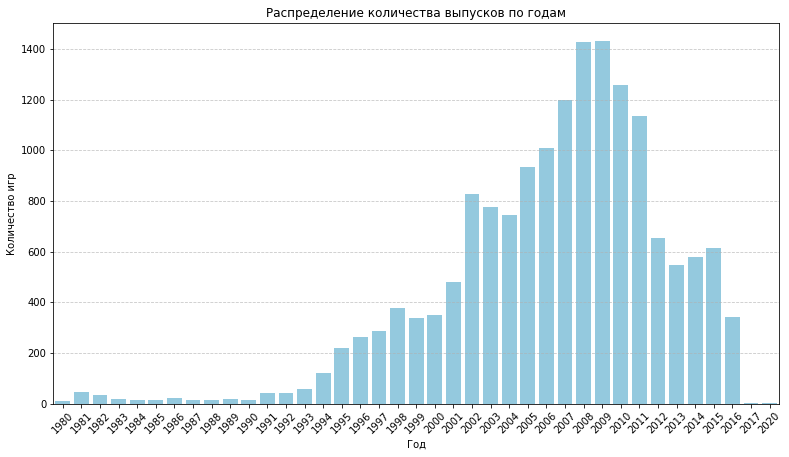

In [10]:
# Изменяем тип данных столбца 'Year' на целочисленный для корректного анализа и построения графиков
df['Year'] = df['Year'].astype('int')

# Получаем количество выпущенных игр по годам и сортируем по возрастанию года
games_by_year = df['Year'].value_counts().sort_index()

# Строим график распределения количества игр по годам
plt.figure(figsize=(13, 7))  # Задаем размер графика
sns.barplot(x=games_by_year.index, y=games_by_year.values, color='skyblue')  # Строим столбчатый график
plt.title("Распределение количества выпусков по годам")  # Заголовок графика
plt.xlabel("Год")  # Подпись оси X
plt.ylabel("Количество игр")  # Подпись оси Y
plt.xticks(rotation=45)  # Поворачиваем подписи на оси X для удобства чтения
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.show()

In [11]:
# Получаем описательные статистики по столбцу 'Year'
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

На каких платформах произошло больше всего релизов?

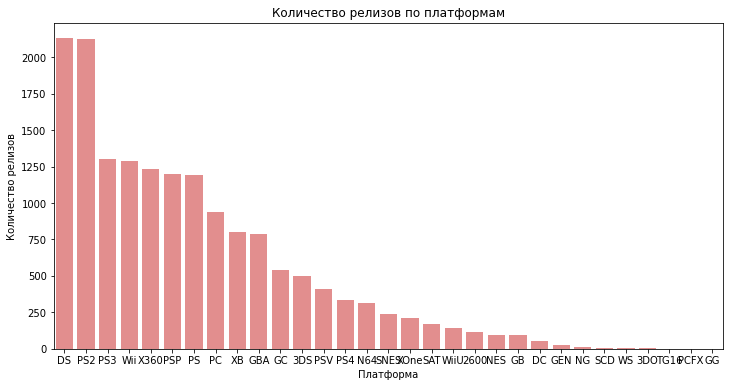

In [12]:
# Считаем количество игр для каждой платформы
platform_counts = df['Platform'].value_counts()

# Строим график распределения количества релизов по платформам
plt.figure(figsize=(12, 6))  # Задаем размер графика
sns.barplot(x=platform_counts.index, y=platform_counts.values, color='lightcoral')  # Строим столбчатый график

# Оформляем график
plt.title("Количество релизов по платформам")  # Заголовок графика
plt.xlabel("Платформа")  # Подпись оси X
plt.ylabel("Количество релизов")  # Подпись оси Y
plt.show()

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Игры каких издателей (Publisher) встречаются в датасете чаще всего

In [14]:
# Фильтруем данные: выбираем игры издателя 'Nintendo' и считаем количество по платформам
df.query("Publisher == 'Nintendo'")['Platform'].value_counts()

DS      149
GBA      91
3DS      82
Wii      81
GB       60
N64      59
GC       53
NES      45
WiiU     40
SNES     36
Name: Platform, dtype: int64

В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other

In [15]:
# Считаем средние продажи игр Nintendo по регионам: NA, EU, JP, Other и Global
mean_sales = df.query("Publisher == 'Nintendo'").agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean',
    'Global_Sales': 'mean'
})
mean_sales.max()

2.563836206896552

In [24]:
max_region = mean_sales.idxmax()
print(f"Максимальное значение продаж: {mean_sales.max()} в регионе {max_region}")

Максимальное значение продаж: 2.563836206896552 в регионе Global_Sales


In [44]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах

In [16]:
df.query("Publisher == 'Nintendo'")['JP_Sales'].agg(['median', 'mean'])

median    0.280000
mean      0.653721
Name: JP_Sales, dtype: float64

In [25]:
# Вычисляем межквартильный размах (IQR) для продаж игр Nintendo в Японии
JP_Sales_revenue = df.query("Publisher == 'Nintendo'")['JP_Sales']
Q1 = np.percentile(JP_Sales_revenue, 25)  # Первый квартиль (25%)
Q3 = np.percentile(JP_Sales_revenue, 75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах
IQR

0.65

Для продаж игр Nintendo в Японии:
	
    Медиана составляет 0.28 млн копий.
    Среднее значение выше медианы и равно 0.65 млн, что указывает на наличие выбросов (некоторые игры с очень высокими продажами).
		Межквартильный размах (IQR) равен 0.65 млн, что отражает умеренный разброс данных между 25% и 75% квантилями.

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [53]:

# Группируем данные по годам и жанрам для игр Nintendo, суммируем глобальные продажи
nintendo_sale = df.query(
    "Publisher == 'Nintendo' & Genre in ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']"
).groupby('Year', as_index=False).agg({'Global_Sales': 'sum'})

print(nintendo_sale.head())  # Проверяем первые строки

   Year  Global_Sales
0  1983          8.82
1  1984         11.86
2  1985         45.13
3  1986          6.37
4  1987          7.57


In [54]:
nintenos_sale.head()

,Year,Global_Sales
0,1983,8.82
1,1984,11.86
2,1985,45.13
3,1986,6.37
4,1987,7.57


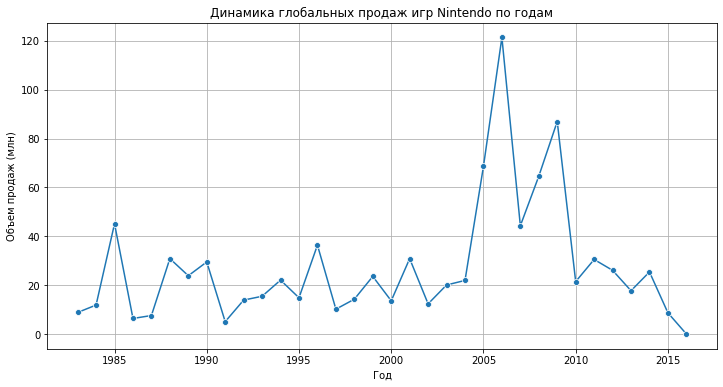

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data = nintendo_sale, marker='o')
plt.title("Динамика глобальных продаж игр Nintendo по годам")
plt.xlabel("Год")
plt.ylabel("Объем продаж (млн)")
plt.grid()
plt.show()

# Вывод по динамике глобальных продаж игр Nintendo:

1.	Основной период роста:
Анализ динамики глобальных продаж игр Nintendo показывает, что наибольший рост объемов продаж наблюдается в промежуток 2005–2010 годов. Этот период характеризуется несколькими значительными пиками, что указывает на популярность ряда успешных релизов игр Nintendo.


2.	Пики продаж:
Основные пики на графике подчеркивают успешные релизы, которые достигли максимальных значений по объему глобальных продаж. Это свидетельствует о значительном вкладе ключевых игр Nintendo в рост популярности и выручки компании на мировом рынке.

Добавляем дополнительные элементы на графиках

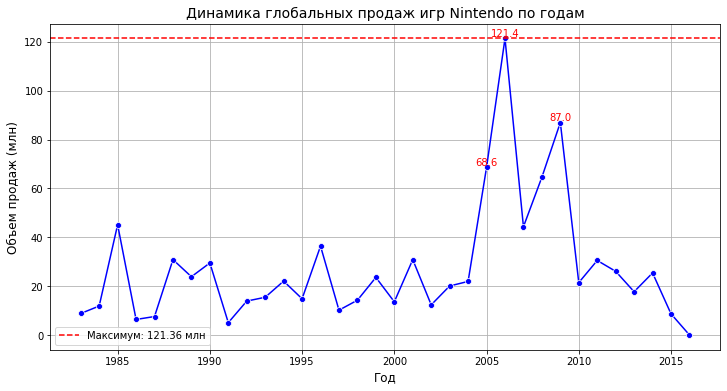

In [77]:
# Добавляем подписи к пикам и горизонтальные линии на максимумах
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=nintendo_sale, marker='o', color='b')

# Подписи осей и заголовок
plt.title("Динамика глобальных продаж игр Nintendo по годам", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Объем продаж (млн)", fontsize=12)

# Горизонтальная линия на максимальном значении
max_sales = nintendo_sale['Global_Sales'].max()
plt.axhline(y=max_sales, color='r', linestyle='--', label=f"Максимум: {max_sales:.2f} млн")

# Подписи для пиков
for year, sales in nintendo_sale.nlargest(3, 'Global_Sales')[['Year', 'Global_Sales']].values:
    plt.text(year, sales, f"{sales:.1f}", ha = 'center', va = 'bottom', fontsize = 10, color = 'r')

plt.legend()
plt.grid()
plt.show()

In [79]:
nintendo_sale.head()

,Year,Global_Sales
0,1983,8.82
1,1984,11.86
2,1985,45.13
3,1986,6.37
4,1987,7.57


# Анализ продаж игр Nintendo по платформам и жанрам в пиковые годы (2005–2010)

Продажи по платформам в 2005–2010 гг.:
 Platform
Wii    375.47
DS     324.24
GC      10.68
GBA      8.05
Name: Global_Sales, dtype: float64
Продажи по жанрам в 2005–2010 гг.:
 Genre
Sports          175.57
Misc            124.03
Platform        108.09
Role-Playing     87.39
Racing           61.94
Puzzle           46.68
Simulation       46.65
Action           32.87
Fighting         15.02
Shooter          10.29
Adventure         6.58
Strategy          3.33
Name: Global_Sales, dtype: float64


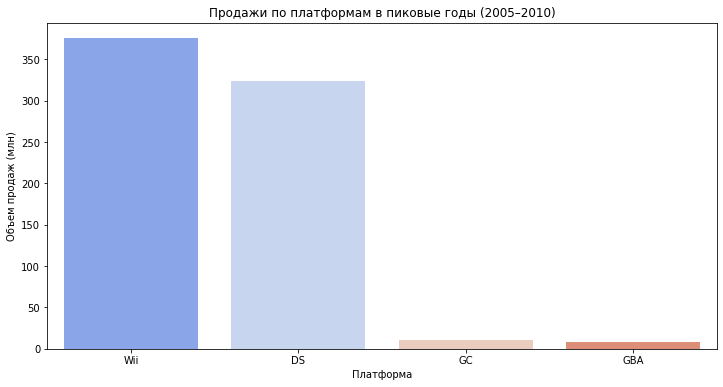

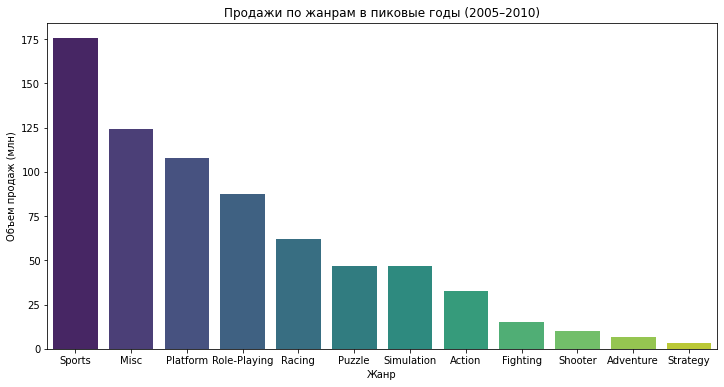

In [75]:
# Фильтруем данные по пиковым годам
peak_years = df.query("Publisher == 'Nintendo' & Year >= 2005 and Year <= 2010")

# Анализ по платформам
platform_sales = peak_years.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print("Продажи по платформам в 2005–2010 гг.:\n", platform_sales)

# Анализ по жанрам
genre_sales = peak_years.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print("Продажи по жанрам в 2005–2010 гг.:\n", genre_sales)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')
plt.title("Продажи по платформам в пиковые годы (2005–2010)")
plt.xlabel("Платформа")
plt.ylabel("Объем продаж (млн)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title("Продажи по жанрам в пиковые годы (2005–2010)")
plt.xlabel("Жанр")
plt.ylabel("Объем продаж (млн)")
plt.show()

# Сравнение с другими издателями:

Сравним динамику продаж Nintendo с другими топ-издателями (например, EA и Activision):

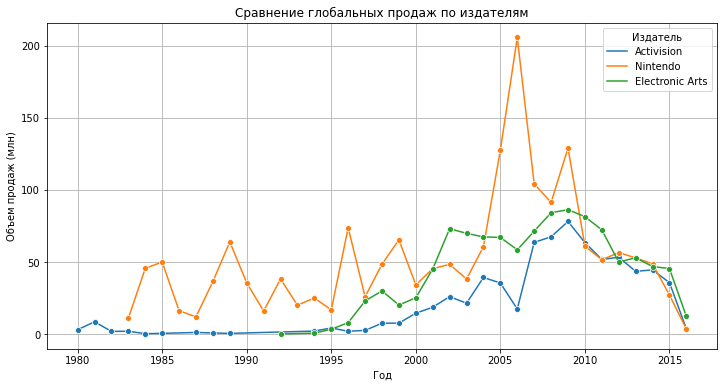

In [68]:
# Фильтруем данные по издателям
top_publishers = df.query("Publisher in ['Nintendo', 'Electronic Arts', 'Activision']")

# Группируем продажи по годам и издателям
publisher_sales = top_publishers.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=publisher_sales, marker='o')
plt.title("Сравнение глобальных продаж по издателям")
plt.xlabel("Год")
plt.ylabel("Объем продаж (млн)")
plt.legend(title="Издатель")
plt.grid()
plt.show()

## Краткое резюме:
1. **Динамика продаж**: Наибольший рост продаж игр Nintendo наблюдался в период 2005–2010 годов. Основные пики приходятся на успешные релизы игр.
2. **Платформы и жанры**: В пиковые годы лидировали платформы Wii и DS, а среди жанров наибольший вклад внесли Sports и Platform.
3. **Сравнение с конкурентами**: Nintendo показала стабильный рост продаж по сравнению с другими издателями, такими как EA и Activision.
4. **Медиана и межквартильный размах**: В Японии медиана продаж составляет **0.28 млн**, среднее значение – **0.65 млн**, а межквартильный размах – **0.65 млн**.